<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 196.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 117.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 123.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 184.5 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-09-07 13:42:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  62.8MB/s    in 2.4s    

2025-09-07 13:42:42 (62.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


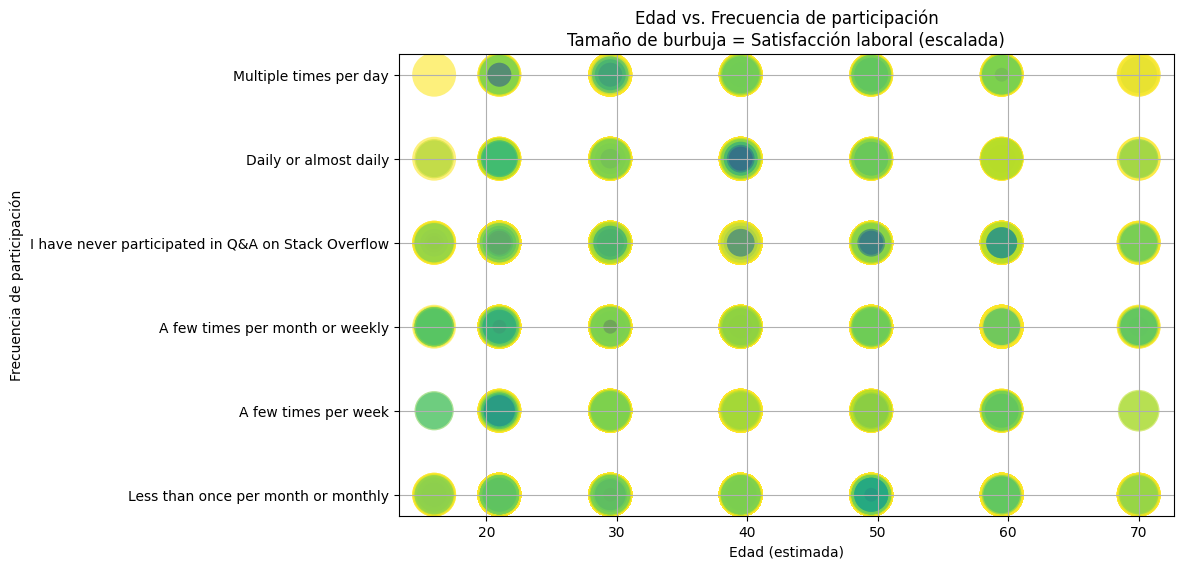

In [8]:
# Filtrar edades válidas
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df_filtered = df[df['Age'].isin(age_map.keys())].copy()
df_filtered['Age_num'] = df_filtered['Age'].map(age_map)

# Eliminar nulos
df_clean = df_filtered[['Age_num', 'SOPartFreq', 'JobSat']].dropna()

# Escalar JobSat directamente (sin normalizar)
bubble_size = df_clean['JobSat'] * 100  # Ajusta el factor si aún se ven iguales

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.scatter(
    df_clean['Age_num'],
    df_clean['SOPartFreq'],
    s=bubble_size,
    c=df_clean['JobSat'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='none'
)


plt.xlabel('Edad (estimada)')
plt.ylabel('Frecuencia de participación')
plt.title('Edad vs. Frecuencia de participación\nTamaño de burbuja = Satisfacción laboral (escalada)')
plt.grid(True)
plt.show()


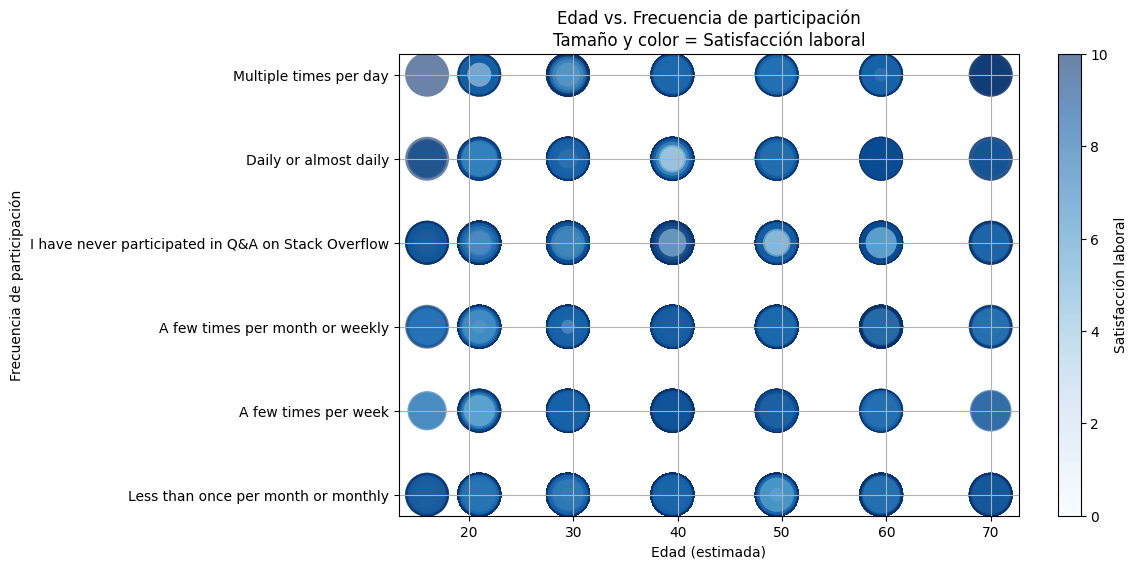

In [9]:
# Escalar JobSat para que el área sea proporcional
bubble_size = df_clean['JobSat'] * 100  # Ajusta el factor según el rango

# Crear gráfico sin bordes marcados
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_clean['Age_num'],
    df_clean['SOPartFreq'],
    s=bubble_size,
    c=df_clean['JobSat'],           # Color también representa satisfacción
    cmap='Blues',
    alpha=0.6,
    edgecolors='none'               # Sin borde para evitar distracción
)

# Etiquetas y leyenda
plt.xlabel('Edad (estimada)')
plt.ylabel('Frecuencia de participación')
plt.title('Edad vs. Frecuencia de participación\nTamaño y color = Satisfacción laboral')
plt.colorbar(scatter, label='Satisfacción laboral')
plt.grid(True)
plt.show()


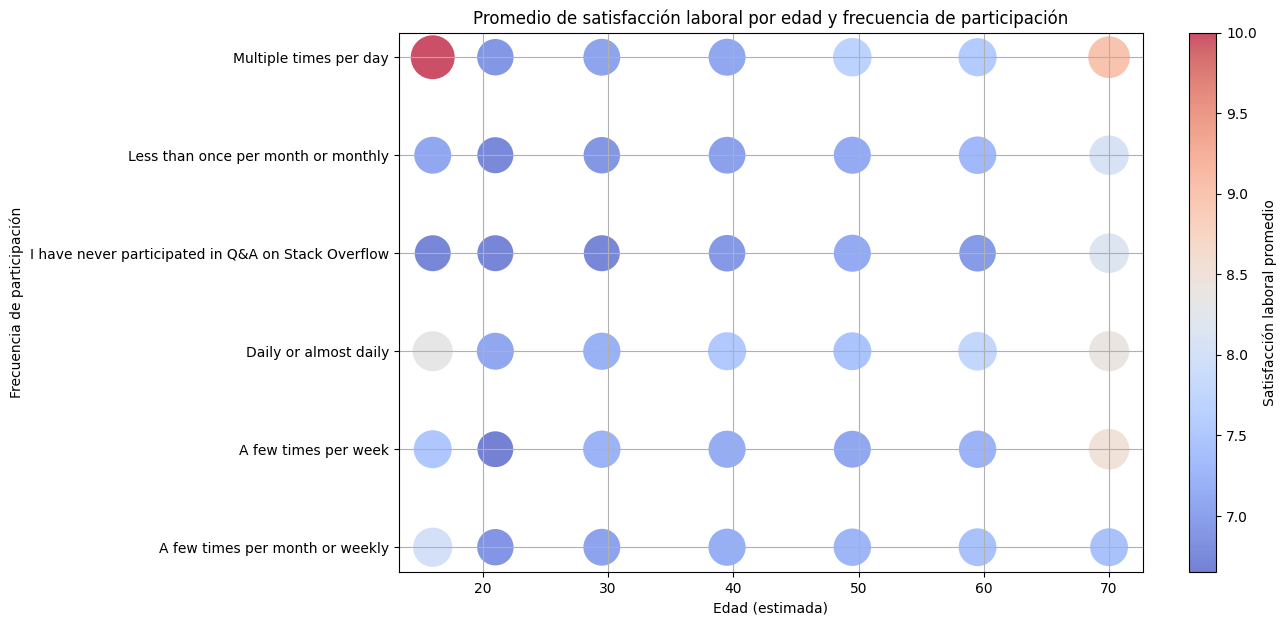

In [10]:
# Agrupar por edad y frecuencia de participación
grouped = df_clean.groupby(['Age_num', 'SOPartFreq']).agg({'JobSat': 'mean'}).reset_index()

# Escalar tamaño de burbuja
bubble_size = grouped['JobSat'] * 100

# Crear gráfico
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    grouped['Age_num'],
    grouped['SOPartFreq'],
    s=bubble_size,
    c=grouped['JobSat'],
    cmap='coolwarm',
    alpha=0.7,
    edgecolors='none'
)

plt.xlabel('Edad (estimada)')
plt.ylabel('Frecuencia de participación')
plt.title('Promedio de satisfacción laboral por edad y frecuencia de participación')
plt.colorbar(scatter, label='Satisfacción laboral promedio')
plt.grid(True)
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


In [11]:
# Mapeo de edades
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# Filtrar edades válidas
df_filtered = df[df['Age'].isin(age_map.keys())].copy()
df_filtered['Age_num'] = df_filtered['Age'].map(age_map)

# Filtrar columnas necesarias y eliminar nulos
df_comp = df_filtered[['ConvertedCompYearly', 'JobSat', 'Age_num']].dropna()


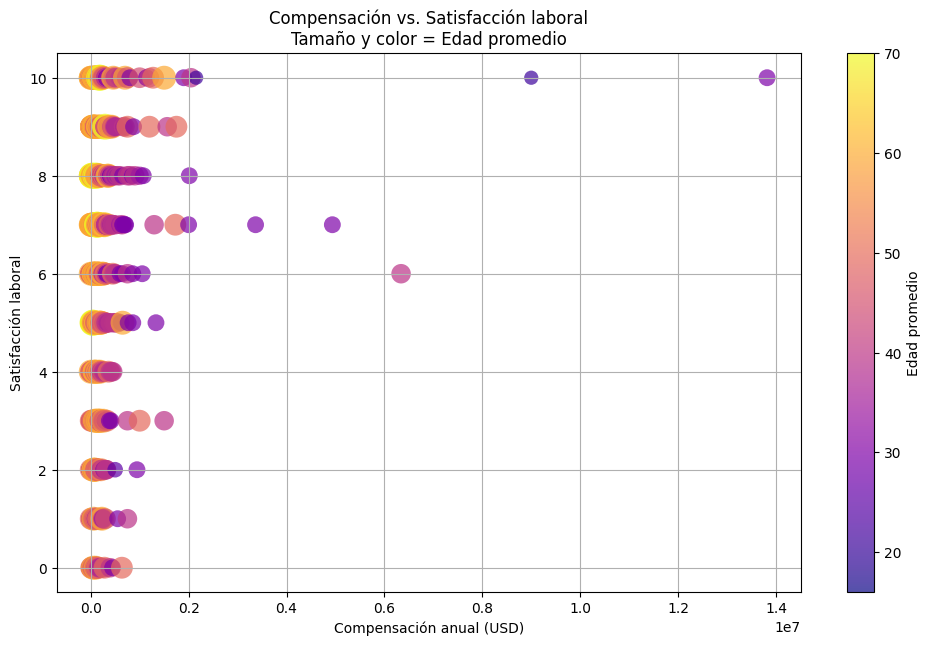

In [15]:
# Agrupar por compensación anual y satisfacción laboral
grouped = df_comp.groupby(['ConvertedCompYearly', 'JobSat']).agg({'Age_num': 'mean'}).reset_index()

# Escalar edad promedio para tamaño de burbuja
bubble_size = grouped['Age_num'] * 5  # Ajusta el factor si lo ves muy pequeño o muy grande

# Crear gráfico
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    grouped['ConvertedCompYearly'],
    grouped['JobSat'],
    s=bubble_size,
    c=grouped['Age_num'],         # Color también representa edad promedio
    cmap='plasma',
    alpha=0.7,
    edgecolors='none'
)

# Etiquetas y leyenda
plt.xlabel('Compensación anual (USD)')
plt.ylabel('Satisfacción laboral')
plt.title('Compensación vs. Satisfacción laboral\nTamaño y color = Edad promedio')
plt.colorbar(scatter, label='Edad promedio')
plt.grid(True)
plt.show()




### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



In [16]:
# Filtrar edades válidas y aplicar mapeo
age_map = {
    'Under 18 years old': 'Under 18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+'
}
df_lang = df[df['Age'].isin(age_map.keys())].copy()
df_lang['AgeGroup'] = df_lang['Age'].map(age_map)

# Eliminar nulos en LanguageHaveWorkedWith
df_lang = df_lang[['AgeGroup', 'LanguageHaveWorkedWith']].dropna()

# Separar lenguajes en filas individuales
df_exploded = df_lang.assign(Language=df_lang['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Agrupar por edad y lenguaje, y contar frecuencia
grouped = df_exploded.groupby(['AgeGroup', 'Language']).size().reset_index(name='Frequency')


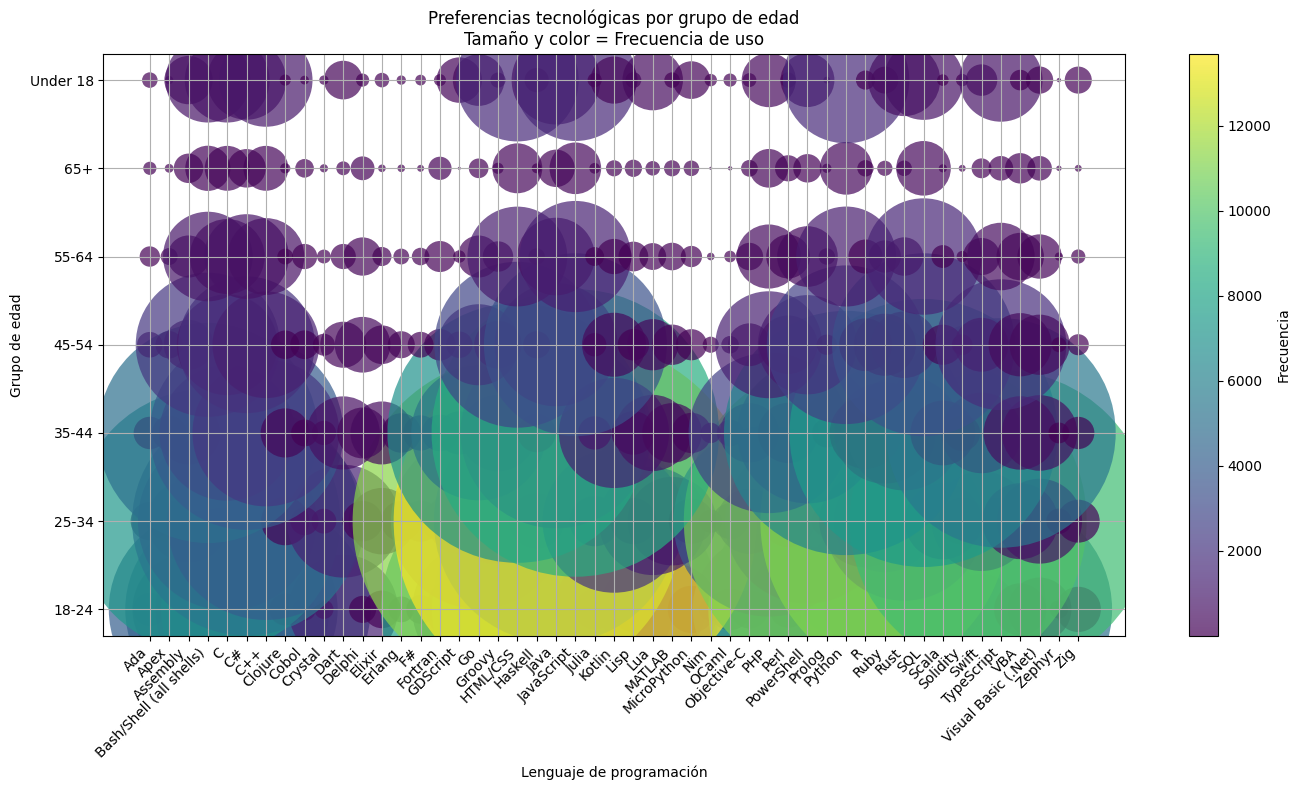

In [17]:
# Escalar frecuencia para tamaño de burbuja
bubble_size = grouped['Frequency'] * 5  # Ajusta el factor si es necesario

# Crear gráfico
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    grouped['Language'],
    grouped['AgeGroup'],
    s=bubble_size,
    c=grouped['Frequency'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='none'
)

# Etiquetas y leyenda
plt.xlabel('Lenguaje de programación')
plt.ylabel('Grupo de edad')
plt.title('Preferencias tecnológicas por grupo de edad\nTamaño y color = Frecuencia de uso')
plt.xticks(rotation=45, ha='right')
plt.colorbar(scatter, label='Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


In [18]:
# Filtrar filas con datos válidos
df_db = df[['DatabaseWantToWorkWith', 'JobSat']].dropna()

# Separar bases de datos en filas individuales
df_exploded = df_db.assign(Database=df_db['DatabaseWantToWorkWith'].str.split(';')).explode('Database')

# Agrupar por base de datos y nivel de satisfacción laboral
grouped = df_exploded.groupby(['Database', 'JobSat']).size().reset_index(name='Frequency')


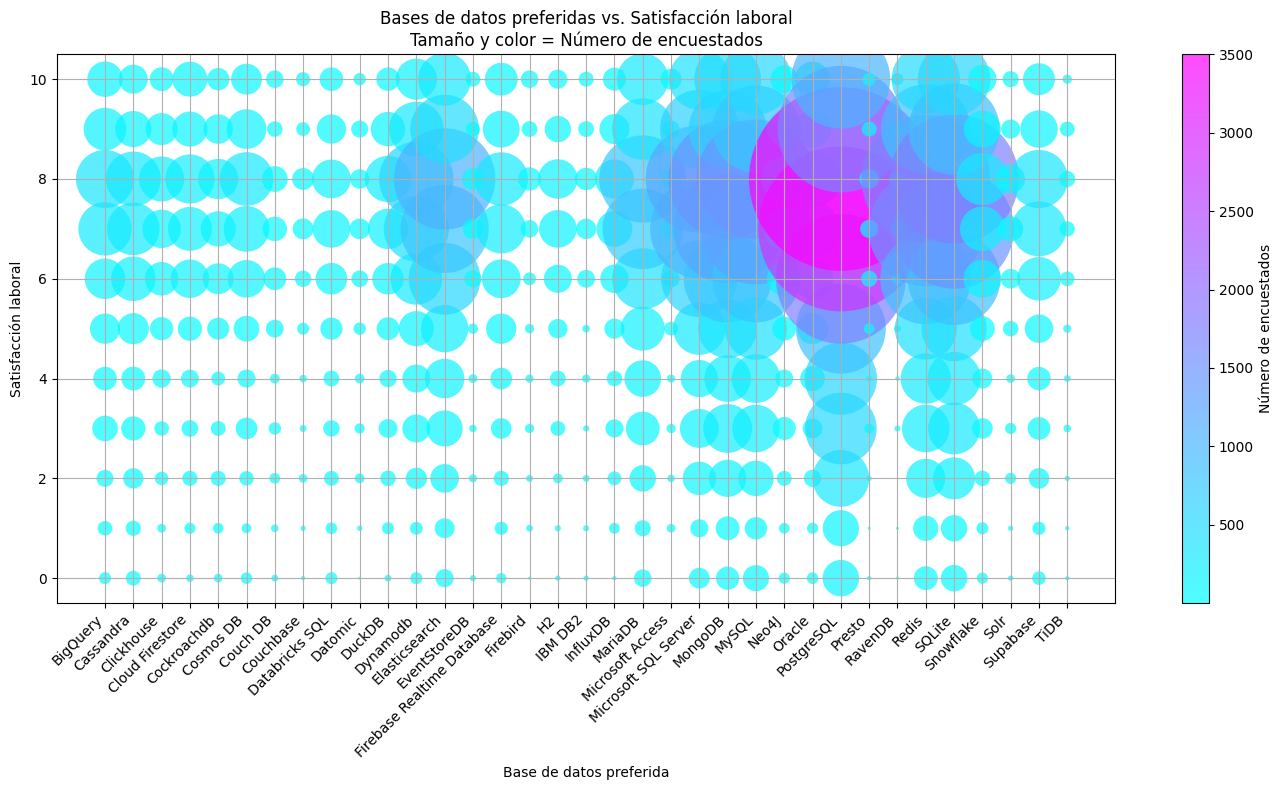

In [19]:
# Escalar frecuencia para tamaño de burbuja
bubble_size = grouped['Frequency'] * 5  # Ajusta el factor si es necesario

# Crear gráfico
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    grouped['Database'],
    grouped['JobSat'],
    s=bubble_size,
    c=grouped['Frequency'],
    cmap='cool',
    alpha=0.7,
    edgecolors='none'
)

# Etiquetas y leyenda
plt.xlabel('Base de datos preferida')
plt.ylabel('Satisfacción laboral')
plt.title('Bases de datos preferidas vs. Satisfacción laboral\nTamaño y color = Número de encuestados')
plt.xticks(rotation=45, ha='right')
plt.colorbar(scatter, label='Número de encuestados')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [20]:
# Filtrar columnas necesarias y eliminar nulos
df_roles = df[['DevType', 'ConvertedCompYearly', 'JobSat']].dropna()

# Separar múltiples roles en filas individuales
df_exploded = df_roles.assign(Role=df_roles['DevType'].str.split(';')).explode('Role')

# Agrupar por rol y compensación, calculando satisfacción promedio
grouped = df_exploded.groupby(['Role', 'ConvertedCompYearly']).agg({'JobSat': 'mean'}).reset_index()


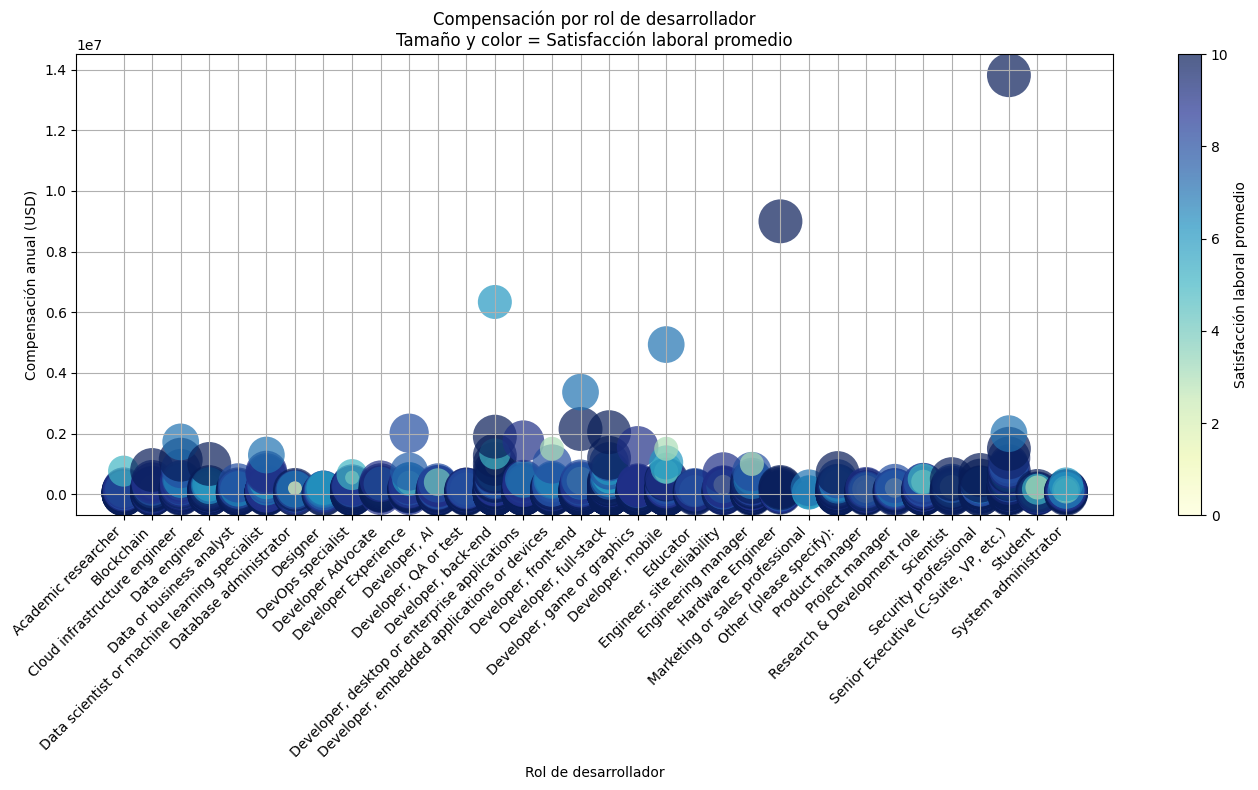

In [21]:
# Escalar satisfacción laboral para tamaño de burbuja
bubble_size = grouped['JobSat'] * 100  # Ajusta el factor si es necesario

# Crear gráfico
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    grouped['Role'],
    grouped['ConvertedCompYearly'],
    s=bubble_size,
    c=grouped['JobSat'],
    cmap='YlGnBu',
    alpha=0.7,
    edgecolors='none'
)

# Etiquetas y leyenda
plt.xlabel('Rol de desarrollador')
plt.ylabel('Compensación anual (USD)')
plt.title('Compensación por rol de desarrollador\nTamaño y color = Satisfacción laboral promedio')
plt.xticks(rotation=45, ha='right')
plt.colorbar(scatter, label='Satisfacción laboral promedio')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


In [22]:
# Mapeo de grupos de edad
age_map = {
    'Under 18 years old': 'Under 18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+'
}

# Filtrar edades válidas y aplicar mapeo
df_tools = df[df['Age'].isin(age_map.keys())].copy()
df_tools['AgeGroup'] = df_tools['Age'].map(age_map)

# Eliminar nulos en la columna de herramientas
df_tools = df_tools[['AgeGroup', 'NEWCollabToolsHaveWorkedWith']].dropna()

# Separar herramientas en filas individuales
df_exploded = df_tools.assign(Tool=df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('Tool')

# Agrupar por grupo de edad y herramienta, y contar frecuencia
grouped = df_exploded.groupby(['AgeGroup', 'Tool']).size().reset_index(name='Frequency')


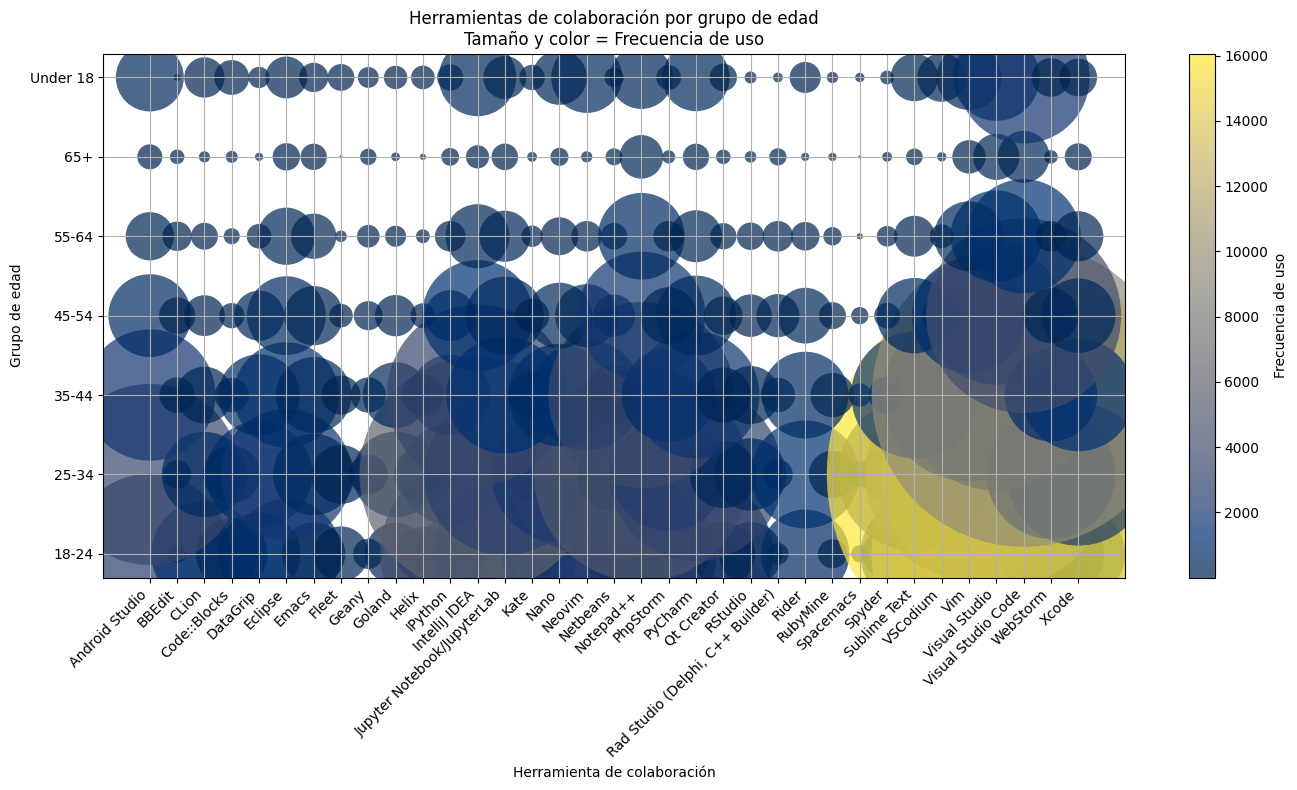

In [24]:
# Escalar frecuencia para tamaño de burbuja
bubble_size = grouped['Frequency'] * 5  # Ajusta el factor si es necesario

# Crear gráfico
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    grouped['Tool'],
    grouped['AgeGroup'],
    s=bubble_size,
    c=grouped['Frequency'],
    cmap='cividis',
    alpha=0.7,
    edgecolors='none'
)

# Etiquetas y leyenda
plt.xlabel('Herramienta de colaboración')
plt.ylabel('Grupo de edad')
plt.title('Herramientas de colaboración por grupo de edad\nTamaño y color = Frecuencia de uso')
plt.xticks(rotation=45, ha='right')
plt.colorbar(scatter, label='Frecuencia de uso')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [25]:
# Filtrar columnas necesarias y eliminar nulos
df_web = df[['WebframeWantToWorkWith', 'JobSat']].dropna()

# Separar frameworks en filas individuales
df_exploded = df_web.assign(Framework=df_web['WebframeWantToWorkWith'].str.split(';')).explode('Framework')

# Agrupar por framework y nivel de satisfacción laboral
grouped = df_exploded.groupby(['Framework', 'JobSat']).size().reset_index(name='Frequency')


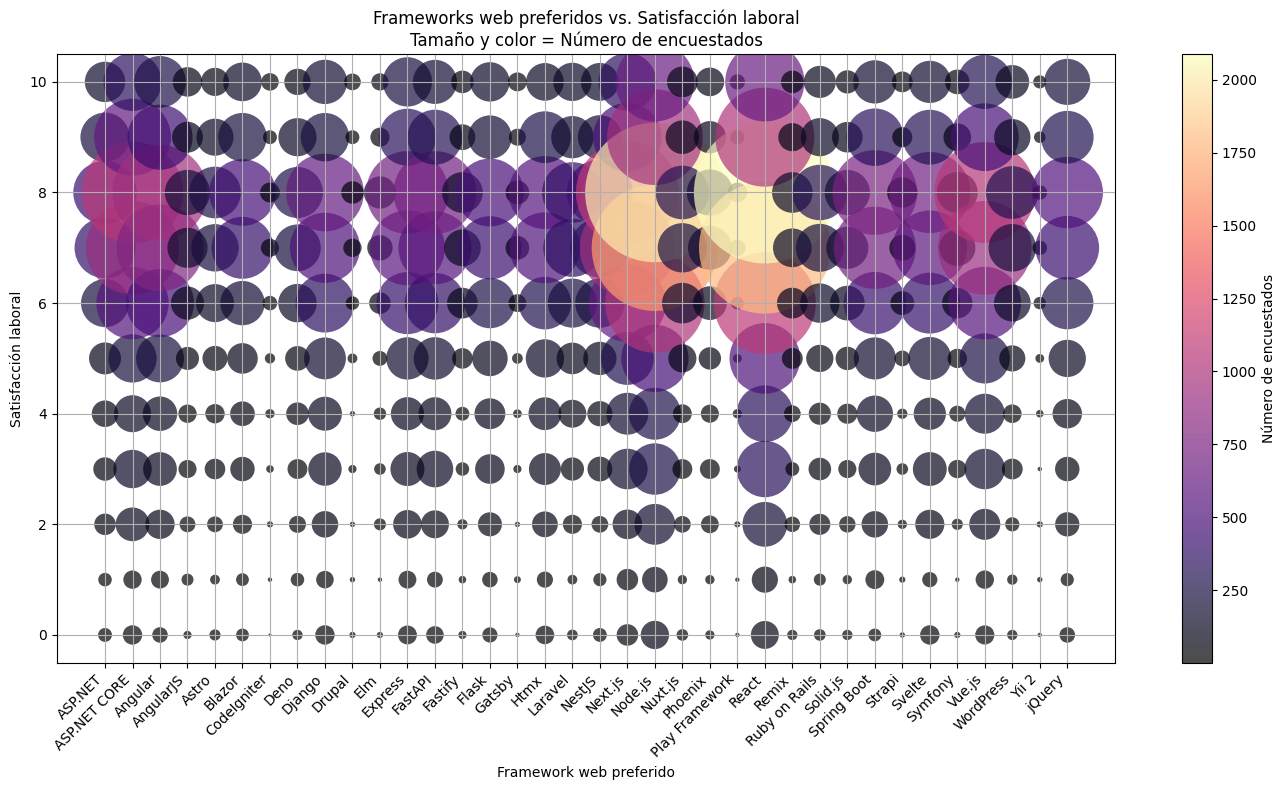

In [26]:
# Escalar frecuencia para tamaño de burbuja
bubble_size = grouped['Frequency'] * 5  # Ajusta el factor si es necesario

# Crear gráfico
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    grouped['Framework'],
    grouped['JobSat'],
    s=bubble_size,
    c=grouped['Frequency'],
    cmap='magma',
    alpha=0.7,
    edgecolors='none'
)

# Etiquetas y leyenda
plt.xlabel('Framework web preferido')
plt.ylabel('Satisfacción laboral')
plt.title('Frameworks web preferidos vs. Satisfacción laboral\nTamaño y color = Número de encuestados')
plt.xticks(rotation=45, ha='right')
plt.colorbar(scatter, label='Número de encuestados')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [27]:
# Filtrar columnas necesarias y eliminar nulos
df_admired = df[['LanguageAdmired', 'Country']].dropna()

# Separar tecnologías admiradas en filas individuales
df_exploded = df_admired.assign(Tech=df_admired['LanguageAdmired'].str.split(';')).explode('Tech')

# Agrupar por país y tecnología admirada, y contar frecuencia
grouped = df_exploded.groupby(['Country', 'Tech']).size().reset_index(name='Frequency')


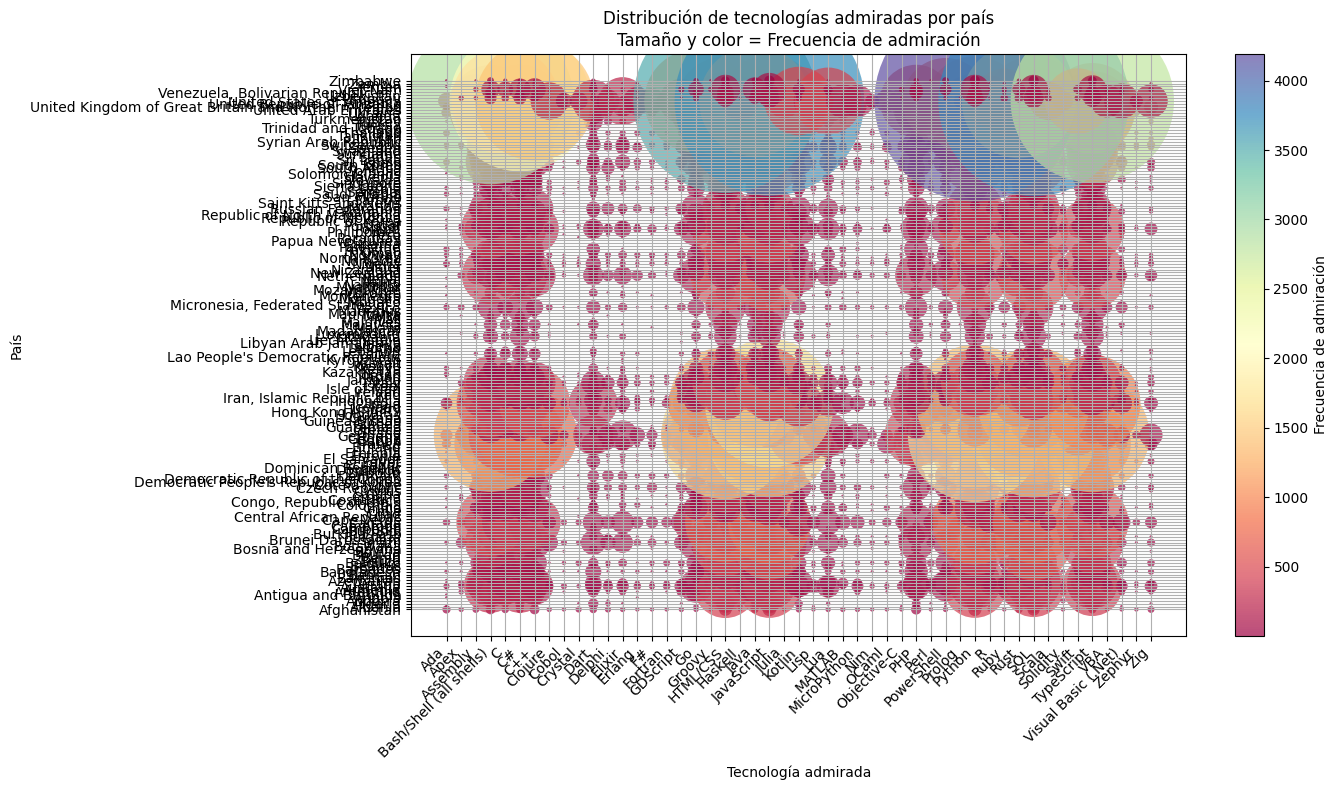

In [28]:
# Escalar frecuencia para tamaño de burbuja
bubble_size = grouped['Frequency'] * 5  # Ajusta el factor si es necesario

# Crear gráfico
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    grouped['Tech'],
    grouped['Country'],
    s=bubble_size,
    c=grouped['Frequency'],
    cmap='Spectral',
    alpha=0.7,
    edgecolors='none'
)

# Etiquetas y leyenda
plt.xlabel('Tecnología admirada')
plt.ylabel('País')
plt.title('Distribución de tecnologías admiradas por país\nTamaño y color = Frecuencia de admiración')
plt.xticks(rotation=45, ha='right')
plt.colorbar(scatter, label='Frecuencia de admiración')
plt.grid(True)
plt.tight_layout()
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
